In [24]:
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv("/Users/manuelmelendez/Desktop/SQL PROJECTS/Netflix Project/netflix_titles.csv")


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
data['date_added'] = data['date_added'].str.strip()



In [7]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [9]:
data['release_year'] = pd.to_datetime(data['release_year'], format = '%Y')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   datetime64[ns]
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](2), object(10)
memory usage: 825.8+ KB


In [12]:
data.to_csv('/Users/manuelmelendez/Desktop/SQL PROJECTS/Nnetflix.csv', index=False)


### IN SQL NAMES LOOK LIKE THIS, SO lets check here 
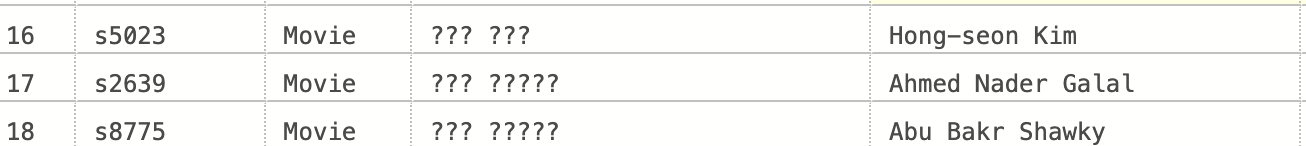

In [38]:
data[data['show_id'] == 's5023']   #The problem is the title is in differente language - need to create as Nvarchar


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5022,s5023,Movie,반드시 잡는다,Hong-seon Kim,Baek Yoon-sik,South Korea,2018-02-28,2017-01-01,TV-MA,110 min,"Dramas, International Movies, Thrillers",After people in his town start turning up dead...


### .str.len().max() te permite ver la longitud de la columna 

In [18]:
# data.show_id.str.len().max()
# data.type.str.len().max()
# data.title.str.len().max()
# data.director.str.len().max()
# data.cast.str.len().max()
# data.country.str.len().max()
# data.rating.str.len().max()
# data.duration.str.len().max()
# data.listed_in.str.len().max()
# data.description.str.len().max()


123.0

In [23]:
data.description.str.len().max()

248

<Axes: >

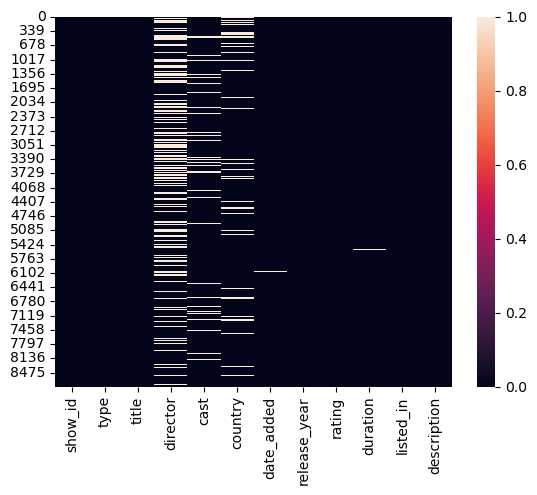

In [25]:
sns.heatmap(data.isnull())

In [26]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
-- FOr each director who did at least a tv show and a movie, how many in diffrent row they did it. 

SELECT nd.director, 
COUNT(DISTINCT CASE WHEN n.type = 'Movie' THEN n.show_id END) AS movies,     -- COUNT los shows_id cuando sea movie
COUNT(DISTINCT CASE WHEN n.type = 'TV Show' THEN n.show_id END) AS tv_show -- COUNT los shows_id cuando sea tv show
FROM netflix2 n
INNER JOIN netflix_directors nd ON n.show_id = nd.show_id      -- JOIN Porque tenemos los directores en otra parte
GROUP BY nd.director
HAVING COUNT(DISTINCT n.type) > 1;

In [ ]:
-- which country has the highst number of comedy movies?
SELECT nc.country,COUNT(DISTINCT ng.show_id)AS Comedies 
FROM netflix2 n
INNER JOIN netflix_Genre ng ON n.show_id = ng.show_id
INNER JOIN netflix_country nc ON n.show_id = nc.show_id

WHERE ng.Genre = 'Comedies' AND n.type ='Movie'
GROUP BY nc.country
ORDER BY COUNT(ng.Genre) DESC

In [ ]:


-- Per each year which is the director with more movies
with cte  as 
    (SELECT year(n.date_added)as year_released, nd.director,count(n.show_id) as Movies
FROM netflix2 n
INNER JOIN netflix_directors nd ON n.show_id = nd.show_id
WHERE n.type = 'Movie'
GROUP BY year(n.date_added),nd.director       -- ESta table y query es una agrupacion de peliculas por año, los directores
),

cte2 as (
SELECT *, ROW_NUMBER()OVER(partition BY year_released ORDER BY Movies DESC, director) as rn FROM cte)
-- a la tabla anterior le agrega una columna contando cada entrada ordenada por mayor numero de peliculas
SELECT * FROM cte2 WHERE rn = 1  -- EScojo los que sean numero 1


ORDER BY Movies DESC